In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
import joblib
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import numpy as np

In [2]:
#Hyperparameter Optimization Toolkit
from bayes_opt import BayesianOptimization

In [3]:
path="./dataset/"
file='Cor_train.pkl'
train_df= pd.read_pickle(path+file)
train_df

,monomer_ID,smiles,TC,Monomer_length,MW_ratio,Mass_max,Mass_ave,K_bond_min,K_bond_ave,K_ang_ave,...,Mor19,Mor31,SMR_VSA1,SMR_VSA3,SlogP_VSA5,SlogP_VSA10,EState_VSA1,EState_VSA5,VSA_EState4,VSA_EState7
1040,PI1127,*Oc1ccc(C(C)(C)c2ccc(OC(=O)SCCCSC(*)=O)cc2)cc1,0.187003,18.44,0.927781,32.067,8.445870,182.96,358.148750,58.585646,...,1.166168,0.340033,19.432465,0.000000,31.395199,9.589074,0.000000,17.325336,2.560220,0.834583
759,PI808,*Oc1c(cc(cc1)C(c1ccc(cc1)C(c1cc(c(cc1)OC(=O)*)...,0.234166,16.84,0.789839,15.999,6.905483,232.52,362.025082,57.530720,...,1.140136,1.159799,14.637928,0.000000,61.075658,4.794537,0.000000,27.817257,7.008897,0.000000
84,PI90,*C(C*)c1c(cccc1)COCCCCC,0.238572,2.61,0.137320,15.999,5.837514,218.51,342.141667,53.424955,...,0.931952,0.621401,4.736863,0.000000,43.733927,0.000000,0.000000,24.825916,3.085222,4.769873
1044,PI1132,*c1ccc(Cc2ccc(N(*)Cc3ccccc3)cc2)cc1,0.238998,10.35,0.667883,14.007,7.141132,250.32,370.125610,59.059072,...,0.332636,0.928172,0.000000,0.000000,16.690354,5.687386,0.000000,22.377741,5.591437,1.037233
159,PI165,*C(C*)c1ccc(cc1)C(=O)OCC(C)C,0.237524,2.60,0.137354,15.999,6.589323,218.51,354.499687,55.940966,...,0.671247,0.301739,9.531400,0.000000,36.189736,0.000000,0.000000,12.487189,2.129772,0.898828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,PI1034,*c1ccc(Oc2ccccc2Oc2ccc(N3C(=O)c4ccc(-c5ccc6c(c...,0.291517,19.40,1.000000,15.999,9.175433,272.66,386.618507,66.540036,...,-0.882484,0.684675,28.651875,5.316789,41.431955,5.687386,11.814359,11.383156,3.140823,0.000000
847,PI907,*Oc1ccc(S(=O)(=O)c2ccc(Oc3ccc(C(C)(C)c4ccc(*)c...,0.165411,18.84,0.535101,32.067,10.467243,209.78,363.837179,70.708243,...,-0.420552,0.835887,81.159223,0.000000,36.101280,52.684981,90.978736,24.265468,-17.571201,-25.513996
715,PI764,*C(=O)NCCNC(=O)c1ccc(N2C(=O)c3ccc(*)cc3C2=O)cc1,0.262578,15.06,1.000000,15.999,8.824184,232.52,392.005122,65.872290,...,0.259140,0.368768,19.178149,10.633577,31.073966,10.481923,0.000000,0.000000,1.743724,0.091628
905,PI969,*C(=O)c1ccc2c(c1)C(=O)N(c1ccc(C3(c4ccc(N5C(=O)...,0.227667,22.24,1.000000,15.999,8.938690,250.32,381.584875,64.520630,...,-0.349817,1.229677,23.972686,0.000000,74.043749,11.374773,17.229350,9.799819,8.257228,0.067189


In [4]:
file1='Cor_test.pkl'
test_df= pd.read_pickle(path+file1)
test_df

,monomer_ID,smiles,TC,Monomer_length,MW_ratio,Mass_max,Mass_ave,K_bond_min,K_bond_ave,K_ang_ave,...,Mor19,Mor31,SMR_VSA1,SMR_VSA3,SlogP_VSA5,SlogP_VSA10,EState_VSA1,EState_VSA5,VSA_EState4,VSA_EState7
49,PI55,*/C=C/CCCCCCCCCC*,0.336325,13.27,1.000000,12.011,4.891412,232.52,334.952647,49.101667,...,1.418080,0.826599,0.000000,0.000000,57.787395,0.000000,0.000000,51.366573,0.000000,15.724121
741,PI790,*CC1(C)CC(*)(C)C(=O)OC1=O,0.185993,5.09,0.818005,15.999,7.341190,232.52,349.626364,58.537163,...,0.988033,0.405348,14.325937,0.000000,20.268296,0.000000,0.000000,0.000000,-0.315069,0.751157
358,PI375,*C(C*)OCCOC,0.251789,2.57,0.274694,15.999,6.007824,218.51,327.684118,56.395938,...,0.635721,0.326187,9.473726,0.000000,0.000000,0.000000,0.000000,6.923737,0.000000,0.000000
993,PI1071,*C(=O)c1ccc2c(c1)C(=O)N(c1c(C(C)C)cc(Cc3cc(C(C...,0.204283,22.41,0.742111,15.999,7.334730,232.52,364.596105,58.595404,...,1.990247,1.472253,23.972686,0.000000,164.232174,11.374773,0.000000,15.866187,9.279165,0.674761
639,PI684,*c1ccc(Cc2ccc(-n3c(=O)c4cc5c(=O)n(*)c(=O)c5cc4...,0.315177,16.51,0.931298,15.999,8.689638,250.32,379.708462,64.016256,...,-0.242217,0.753504,0.000000,9.551078,22.253806,0.000000,11.118534,34.309983,3.408797,0.778555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,PI637,*CCCCCCCCCCCNC(=O)CCCCC(=O)N*,0.299844,19.90,1.000000,15.999,5.593491,232.52,346.915472,52.457706,...,2.885457,1.069552,9.589074,11.050456,83.470681,0.000000,0.000000,51.366573,2.841408,14.971719
56,PI62,*C(CC)C(CC)*,0.250043,2.67,0.333333,12.011,4.675667,218.51,327.447778,49.052000,...,0.962662,0.572104,0.000000,0.000000,26.689118,0.000000,0.000000,25.683286,0.000000,5.559537
768,PI817,*Oc1c2c(ccc1)c(ccc2)OC(=O)Oc1ccc(cc1)OC(=O)*,0.241563,15.48,1.000000,15.999,9.478588,357.53,395.132703,69.056379,...,-0.376769,0.246920,28.906191,0.000000,0.000000,9.589074,6.155366,0.000000,0.000000,-0.846514
899,PI963,*c1ccc(Oc2ccc(S(=O)(=O)c3ccc(Oc4ccc(N5C(=O)c6c...,0.244103,31.65,1.000000,32.067,9.582653,209.78,390.896747,67.081307,...,-0.409144,1.287767,41.864209,5.316789,57.353395,5.687386,33.342037,84.179560,1.269442,0.000000


In [5]:
X_train=train_df.drop(train_df.columns[0:3], axis=1)
y_train=train_df["TC"]
X_test=test_df.drop(test_df.columns[0:3], axis=1)
y_test=test_df["TC"]

select_feature=[
'Monomer_length',
 'MW_ratio',
 'Mass_max',
 'Mass_ave',
 'K_bond_ave',
 'K_ang_ave',
 'nH',
 'AATS0d',
 'AATS0Z',
 'ATSC2Z',
 'ATSC5Z',
 'AATSC0Z',
 'AATSC2Z',
 'BCUTd-1h',
 'BCUTZ-1h',
 'nHBDon',
 'MIC0',
 'MIC1',
 'Kier3',
 'Mor02',
 'Mor14',
 'Mor19',
 'SMR_VSA1',
 'SMR_VSA3',
 'VSA_EState4']

X_selecttrain=X_train[select_feature]
X_selecttest=X_test[select_feature]
for i in [X_selecttrain,X_selecttest, y_train, y_test]:
    i.index = range(i.shape[0])
scaler.fit(X_selecttrain)
#scaler.fit(Xtest)
Xtrain  = scaler.transform(X_selecttrain)
Xtest = scaler.transform(X_selecttest)

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import math
import joblib

In [11]:
#Definition of RF model for hyperparameters optimization
def RF(n_estimator,max_depths,min_samples_split,min_samples_leaf):
    n_estimator = int(n_estimator)
    max_depths = int(max_depths)
    min_samples_split=int(np.round(min_samples_split))
    min_samples_leaf=int(np.round(min_samples_leaf))
    rfg = RandomForestRegressor(n_estimators = n_estimator, max_features='auto',random_state=1, max_depth = max_depths,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
    rfg.fit(Xtrain,y_train.values.ravel())
    res = rfg.predict(Xtest)
    print("Training set score: %f" % rfg.score(Xtrain,y_train))
    print("Test set score: %f" % rfg.score(Xtest,y_test))
    error1=rfg.score(Xtrain,y_train)
    error2=rfg.score(Xtest,y_test)
    error=error2
    return error

In [20]:
#Definition of KRR model for hyperparameters optimization
def KRR(kernel_chose,alpha,gamma,degree,coef0):
    if kernel_chose<=1:
        kernel="rbf"
    elif kernel_chose>1 and kernel_chose<=2:
        kernel='laplacian'
    elif kernel_chose>2 and kernel_chose<=3:
        kernel='polynomial'
    else:
        kernel='sigmoid'
    alpha=round(alpha,5)
    gamma==round(gamma,5)
    degree=round(degree)
    coef0=round(coef0,1)
    model=KernelRidge(kernel=kernel,alpha=alpha,gamma=gamma,degree=degree,coef0=coef0)
    model.fit(Xtrain,y_train.values.ravel())
    res = model.predict(Xtest)
    print ("kernel_chose:%s" %kernel)
    print("Training set score: %f" % model.score(Xtrain,y_train))
    print("Test set score: %f" % model.score(Xtest,y_test))
    error1=model.score(Xtrain,y_train)
    error2=model.score(Xtest,y_test)
    error=error2
    return error

In [29]:
#Definition of MLP model for hyperparameters optimization
def MLP(alphas,node,number_hidden_layer,solver_chose):
    randomseed = np.random.seed(0)
    if solver_chose<=1:
        solver='adam'
    elif solver_chose>1 and solver_chose<=2:
        solver='lbfgs'
    else:
        solver='sgd'
    alphas=alphas
    nodes=int(node)
    number_layer=int(number_hidden_layer)
    layer_sizes=[nodes,nodes,nodes,nodes,nodes,nodes,nodes,nodes,nodes,nodes,nodes,nodes][0:number_layer:1]
    print(layer_sizes)
    print(alphas)
    clf = MLPRegressor(solver=solver,alpha=alphas,
                       hidden_layer_sizes=layer_sizes, max_iter=1000,
                       verbose=False, tol=0.0001,random_state=randomseed)
    clf.fit(Xtrain,y_train.values.ravel())
    res = clf.predict(Xtest)
    print("solver: %s" % solver)
    print("Training set score: %f" % clf.score(Xtrain,y_train))
    print("Test set score: %f" % clf.score(Xtest,y_test))
    error=clf.score(Xtest,y_test)
    return error

In [12]:
#Note: Since Bayesian optimization is affected by the initial random candidates, it may cause the optimization hyperparameters to vary slightly from different machines
from bayes_opt import BayesianOptimization
pbounds = {'n_estimator': (10, 2000),"max_depths":(10,25),"min_samples_split":(2,10),"min_samples_leaf":(1,10)}
optimizer = BayesianOptimization(f=RF,pbounds=pbounds,random_state=2)
bo=optimizer.maximize(init_points=10,n_iter=100)

print(optimizer.max)

|   iter    |  target   | max_de... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------
Training set score: 0.925725
Test set score: 0.758280
|  1        |  0.7583   |  16.54    |  1.233    |  6.397    |  876.3    |
Training set score: 0.854306
Test set score: 0.773610
|  2        |  0.7736   |  16.31    |  3.973    |  3.637    |  1.242e+0 |
Training set score: 0.874939
Test set score: 0.773846
|  3        |  0.7738   |  14.49    |  3.401    |  6.969    |  1.063e+0 |
Training set score: 0.806154
Test set score: 0.758151
|  4        |  0.7582   |  12.02    |  5.622    |  3.476    |  1.573e+0 |
Training set score: 0.826086
Test set score: 0.763869
|  5        |  0.7639   |  22.81    |  5.448    |  8.772    |  168.5    |
Training set score: 0.907341
Test set score: 0.768182
|  6        |  0.7682   |  17.58    |  1.588    |  5.425    |  202.1    |
Training set score: 0.804076
Test set score: 0.758944
|  7        |  0.7589   |  11.

Training set score: 0.872860
Test set score: 0.773810
|  47       |  0.7738   |  12.68    |  2.917    |  6.811    |  1.241e+0 |
Training set score: 0.931764
Test set score: 0.759046
|  48       |  0.759    |  14.94    |  1.357    |  5.416    |  1.242e+0 |
Training set score: 0.888697
Test set score: 0.769949
|  49       |  0.7699   |  22.78    |  2.075    |  7.774    |  1.237e+0 |
Training set score: 0.852100
Test set score: 0.772156
|  50       |  0.7722   |  12.76    |  4.42     |  5.772    |  1.241e+0 |
Training set score: 0.882867
Test set score: 0.777068
|  51       |  0.7771   |  21.09    |  3.294    |  2.309    |  1.241e+0 |
Training set score: 0.829392
Test set score: 0.766283
|  52       |  0.7663   |  24.08    |  4.764    |  4.728    |  1.237e+0 |
Training set score: 0.854357
Test set score: 0.773620
|  53       |  0.7736   |  18.65    |  3.747    |  4.388    |  1.242e+0 |
Training set score: 0.919833
Test set score: 0.761678
|  54       |  0.7617   |  24.12    |  1.258    | 

Training set score: 0.854372
Test set score: 0.773790
|  94       |  0.7738   |  17.33    |  3.822    |  3.045    |  1.244e+0 |
Training set score: 0.882686
Test set score: 0.775498
|  95       |  0.7755   |  21.08    |  3.229    |  3.612    |  1.06e+03 |
Training set score: 0.828958
Test set score: 0.765998
|  96       |  0.766    |  22.39    |  5.224    |  3.886    |  1.06e+03 |
Training set score: 0.916879
Test set score: 0.772222
|  97       |  0.7722   |  21.21    |  1.63     |  2.858    |  1.059e+0 |
Training set score: 0.882653
Test set score: 0.775549
|  98       |  0.7755   |  20.26    |  3.34     |  2.659    |  1.058e+0 |
Training set score: 0.940111
Test set score: 0.762568
|  99       |  0.7626   |  19.68    |  1.004    |  4.409    |  1.06e+03 |
Training set score: 0.854336
Test set score: 0.773484
|  100      |  0.7735   |  22.46    |  3.994    |  6.501    |  1.241e+0 |
Training set score: 0.828956
Test set score: 0.765991
|  101      |  0.766    |  20.02    |  4.745    | 

In [14]:
#The set of hyperparameters of the RF model
RF_par=optimizer.max.get('params')
RF_par

{'max_depths': 19.278129232569064,
 'min_samples_leaf': 2.989362159767528,
 'min_samples_split': 5.816558946743761,
 'n_estimator': 1243.5126904380131}

In [19]:
#RF model
print ("***==========Construction of RF model==========***")
n_estimator = int(RF_par.get('n_estimator'))
max_depths = int(RF_par.get('max_depths'))
min_samples_split=int(np.round(RF_par.get('min_samples_split')))
min_samples_leaf=int(np.round(RF_par.get('min_samples_leaf')))
rfg = RandomForestRegressor(n_estimators = n_estimator, max_features='auto',random_state=1, max_depth = max_depths,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
rfg.fit(Xtrain,y_train.values.ravel())
res = rfg.predict(Xtest)
print("Training set score: %f" % rfg.score(Xtrain,y_train))
print("Test set score: %f" % rfg.score(Xtest,y_test))
mse=mean_squared_error(y_test,res)
rmse=math.sqrt(mse)
print('MSE:{}'.format(mse))
print('RMSE:{}'.format(rmse))
RF_train= rfg.predict(Xtrain)
RF_test= rfg.predict(Xtest)

***==========Construction of RF model==========***
Training set score: 0.882925
Test set score: 0.777199
MSE:0.0008715691895641649
RMSE:0.029522350678158487


In [21]:
#Note: Since Bayesian optimization is affected by the initial random candidates, it may cause the optimization hyperparameters to vary slightly from different machines
pbounds = {'kernel_chose':(0,4), 'alpha':(1e-3,1), 'gamma':(0.0001,0.01) ,'degree':(2,5),'coef0':(1,5) }
optimizer_krr= BayesianOptimization(f=KRR,pbounds=pbounds,random_state=2)
bo=optimizer_krr.maximize(init_points=10,n_iter=100)
print(optimizer_krr.max)

|   iter    |  target   |   alpha   |   coef0   |  degree   |   gamma   | kernel... |
-------------------------------------------------------------------------------------
kernel_chose:laplacian
Training set score: 0.627861
Test set score: 0.685263
|  1        |  0.6853   |  0.4366   |  1.104    |  3.649    |  0.00441  |  1.681    |
kernel_chose:laplacian
Training set score: 0.619948
Test set score: 0.678883
|  2        |  0.6789   |  0.331    |  1.819    |  3.858    |  0.003067 |  1.067    |
kernel_chose:rbf
Training set score: 0.584257
Test set score: 0.647400
|  3        |  0.6474   |  0.6215   |  3.117    |  2.404    |  0.005184 |  0.7378   |
kernel_chose:rbf
Training set score: 0.608031
Test set score: 0.668884
|  4        |  0.6689   |  0.7855   |  4.416    |  3.483    |  0.008481 |  0.3186   |
kernel_chose:rbf
Training set score: 0.486044
Test set score: 0.557578
|  5        |  0.5576   |  0.5057   |  1.261    |  3.284    |  0.001056 |  0.5086   |
kernel_chose:laplacian
Training

kernel_chose:polynomial
Training set score: 0.821365
Test set score: 0.657845
|  38       |  0.6578   |  0.001    |  5.0      |  5.0      |  0.0001   |  2.345    |
kernel_chose:rbf
Training set score: 0.601516
Test set score: 0.665446
|  39       |  0.6654   |  1.0      |  3.502    |  5.0      |  0.01     |  0.8496   |
kernel_chose:rbf
Training set score: 0.928314
Test set score: 0.706135
|  40       |  0.7061   |  0.001    |  1.0      |  4.831    |  0.01     |  0.0      |
kernel_chose:rbf
Training set score: 0.601516
Test set score: 0.665446
|  41       |  0.6654   |  1.0      |  1.81     |  2.0      |  0.01     |  0.0      |
kernel_chose:rbf
Training set score: 0.928314
Test set score: 0.706135
|  42       |  0.7061   |  0.001    |  2.305    |  5.0      |  0.01     |  0.9986   |
kernel_chose:laplacian
Training set score: 0.794027
Test set score: 0.732195
|  43       |  0.7322   |  0.001    |  4.282    |  3.81     |  0.0001   |  1.603    |
kernel_chose:polynomial
Training set score: 0

kernel_chose:rbf
Training set score: 0.928314
Test set score: 0.706135
|  76       |  0.7061   |  0.001    |  2.757    |  3.659    |  0.01     |  0.6509   |
kernel_chose:rbf
Training set score: 0.601516
Test set score: 0.665446
|  77       |  0.6654   |  1.0      |  1.0      |  4.298    |  0.01     |  0.0      |
kernel_chose:laplacian
Training set score: 0.139780
Test set score: 0.168618
|  78       |  0.1686   |  1.0      |  3.187    |  2.0      |  0.0001   |  1.789    |
kernel_chose:rbf
Training set score: 0.928314
Test set score: 0.706135
|  79       |  0.7061   |  0.001    |  4.189    |  5.0      |  0.01     |  0.0      |
kernel_chose:polynomial
Training set score: 0.715775
Test set score: 0.717930
|  80       |  0.7179   |  0.1764   |  1.74     |  3.432    |  0.004793 |  2.264    |
kernel_chose:polynomial
Training set score: 0.614358
Test set score: 0.652211
|  81       |  0.6522   |  1.0      |  1.0      |  2.0      |  0.01     |  2.213    |
kernel_chose:rbf
Training set score: 0

In [22]:
#The set of hyperparameters of the KRR model
KRR_par=optimizer_krr.max.get('params')
KRR_par

{'alpha': 0.026572614164137982,
 'coef0': 1.9368959359566578,
 'degree': 2.0677627000798404,
 'gamma': 0.0071451448056355305,
 'kernel_chose': 0.6307439327705886}

In [23]:
#KRR model
print ("***==========Construction of KRR model==========***")
alpha=KRR_par.get('alpha')
coef0=KRR_par.get('coef0')
degree=KRR_par.get('degree')
gamma=KRR_par.get('gamma')
kernel_chose=KRR_par.get('kernel_chose')
if kernel_chose<=1:
    kernel="rbf"
elif kernel_chose>1 and kernel_chose<=2:
    kernel='laplacian'
elif kernel_chose>2 and kernel_chose<=3:
    kernel='polynomial'
else:
    kernel='sigmoid'
alpha=round(alpha,5)
gamma==round(gamma,5)
degree=round(degree)
coef0=round(coef0,1)
model=KernelRidge(kernel=kernel,alpha=alpha,gamma=gamma,degree=degree,coef0=coef0)
model.fit(Xtrain,y_train.values.ravel())
print("Training set score: %f" % model.score(Xtrain,y_train))
print("Test set score: %f" % model.score(Xtest,y_test))
KRR_train = model.predict(Xtrain)
KRR_test = model.predict(Xtest)
mse=mean_squared_error(y_test,KRR_test)
rmse=math.sqrt(mse)
print("MSE: %f" % mse)
print("RMSE: %f" % rmse)

***==========Construction of KRR model==========***
Training set score: 0.802712
Test set score: 0.780567
MSE: 0.000858
RMSE: 0.029298


In [30]:
#Note: Since Bayesian optimization is affected by the initial random candidates, it may cause the optimization hyperparameters to vary slightly from different machines
pbounds = {'alphas': (1e-5, 1),"node":(1,256),"number_hidden_layer":(1,5),'solver_chose':(0,3)}
optimizer_MLP = BayesianOptimization(f=MLP,pbounds=pbounds,random_state=1)
bo=optimizer_MLP.maximize(init_points=10,n_iter=100)
print(optimizer_MLP.max)

|   iter    |  target   |  alphas   |   node    | number... | solver... |
-------------------------------------------------------------------------
[184]
0.417027834482527
solver: adam
Training set score: 0.771051
Test set score: 0.729970
|  1        |  0.73     |  0.417    |  184.7    |  1.0      |  0.907    |
[24]
0.14676442325820488
solver: lbfgs
Training set score: 0.892809
Test set score: 0.748949
|  2        |  0.7489   |  0.1468   |  24.55    |  1.745    |  1.037    |
[138, 138]
0.39677350655592764
solver: sgd
Training set score: -0.374294
Test set score: -1.146124
|  3        | -1.146    |  0.3968   |  138.4    |  2.677    |  2.056    |
[224]
0.20446020520902014
solver: sgd
Training set score: -1.390695
Test set score: -2.091426
|  4        | -2.091    |  0.2045   |  224.9    |  1.11     |  2.011    |
[143]
0.41731062931910334
solver: adam
Training set score: 0.773860
Test set score: 0.716884
|  5        |  0.7169   |  0.4173   |  143.5    |  1.562    |  0.5943   |
[247, 247]
0

D:\software\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


solver: sgd
Training set score: 0.716315
Test set score: 0.695090
|  6        |  0.6951   |  0.8007   |  247.9    |  2.254    |  2.077    |
[229]
0.8763903884045153
solver: adam
Training set score: 0.707334
Test set score: 0.682860
|  7        |  0.6829   |  0.8764   |  229.1    |  1.34     |  0.1172   |
[224]
0.16983872126037328
solver: lbfgs
Training set score: 0.910883
Test set score: 0.791691
|  8        |  0.7917   |  0.1698   |  224.9    |  1.393    |  1.263    |
[136, 136, 136]
0.9578899512552004
solver: adam
Training set score: 0.065588
Test set score: 0.076796
|  9        |  0.0768   |  0.9579   |  137.0    |  3.768    |  0.9465   |
[213]
0.6865040626723068
solver: sgd
Training set score: -1.086656
Test set score: -1.963409
|  10       | -1.963    |  0.6865   |  213.8    |  1.073    |  2.25     |
[42, 42, 42]
0.007729778785561219
solver: sgd
Training set score: -1.307429
Test set score: -2.167710
|  11       | -2.168    |  0.00773  |  42.27    |  3.837    |  2.294    |
[106, 1

D:\software\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


solver: sgd
Training set score: 0.429268
Test set score: 0.435139
|  13       |  0.4351   |  0.6234   |  57.92    |  4.836    |  2.414    |
[207, 207, 207, 207]
0.021216061589892313
solver: sgd
Training set score: -0.256186
Test set score: -0.553567
|  14       | -0.5536   |  0.02122  |  207.0    |  4.859    |  2.106    |
[6]
0.36442554737551286
solver: sgd
Training set score: -3.472363
Test set score: -5.611256
|  15       | -5.611    |  0.3644   |  6.712    |  1.61     |  2.915    |
[136, 136, 136]
0.7288709285180422
solver: adam
Training set score: 0.262944
Test set score: 0.313221
|  16       |  0.3132   |  0.7289   |  136.8    |  3.732    |  0.6986   |
[224]
0.25297825858105005
solver: adam
Training set score: 0.830114
Test set score: 0.721042
|  17       |  0.721    |  0.253    |  224.8    |  1.307    |  0.4799   |
[225, 225]
0.014587365240961582
solver: adam
Training set score: 0.902500
Test set score: 0.638191
|  18       |  0.6382   |  0.01459  |  225.4    |  2.34     |  0.892

solver: lbfgs
Training set score: 0.948245
Test set score: 0.631691
|  51       |  0.6317   |  1e-05    |  229.8    |  3.014    |  1.739    |
[228, 228, 228]
0.9200626150558804
solver: lbfgs
Training set score: 0.567755
Test set score: 0.628564
|  52       |  0.6286   |  0.9201   |  228.7    |  3.725    |  1.569    |
[221, 221, 221, 221]
0.26843017670965225
solver: adam
Training set score: 0.459968
Test set score: 0.532416
|  53       |  0.5324   |  0.2684   |  221.6    |  4.252    |  0.7375   |
[221, 221]
0.0023678745799228258
solver: adam
Training set score: 0.851853
Test set score: 0.492962
|  54       |  0.493    |  0.002368 |  221.7    |  2.183    |  0.68     |
[230, 230, 230]
1.0
solver: lbfgs
Training set score: 0.557484
Test set score: 0.615466
|  55       |  0.6155   |  1.0      |  230.9    |  3.437    |  1.149    |
[230, 230]
1.0


D:\software\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


solver: sgd
Training set score: 0.649327
Test set score: 0.628421
|  56       |  0.6284   |  1.0      |  230.5    |  2.919    |  2.859    |
[231, 231]
0.09043502642683889
solver: sgd
Training set score: -1.003988
Test set score: -1.645782
|  57       | -1.646    |  0.09044  |  231.4    |  2.042    |  2.052    |
[229, 229, 229]
1.0


D:\software\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


solver: sgd
Training set score: 0.546229
Test set score: 0.601652
|  58       |  0.6017   |  1.0      |  229.1    |  3.298    |  3.0      |
[230, 230, 230, 230]
0.8621971046534439


D:\software\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


solver: sgd
Training set score: 0.488272
Test set score: 0.518840
|  59       |  0.5188   |  0.8622   |  230.2    |  4.591    |  2.79     |
[229, 229, 229, 229]
0.2202844637509541
solver: adam
Training set score: 0.454574
Test set score: 0.528752
|  60       |  0.5288   |  0.2203   |  229.7    |  4.621    |  0.5387   |
[228, 228, 228, 228]
0.15506967789356288
solver: sgd
Training set score: 0.018550
Test set score: -0.203028
|  61       | -0.203    |  0.1551   |  228.7    |  4.833    |  2.292    |
[183, 183]
0.5071646356074743
solver: adam
Training set score: 0.539805
Test set score: 0.604597
|  62       |  0.6046   |  0.5072   |  183.6    |  2.137    |  0.8567   |
[185, 185]
0.6076228556728677
solver: lbfgs
Training set score: 0.738572
Test set score: 0.772586
|  63       |  0.7726   |  0.6076   |  185.1    |  2.36     |  1.662    |
[183]
0.3858234601296824
solver: sgd
Training set score: -1.817283
Test set score: -2.840161
|  64       | -2.84     |  0.3858   |  183.8    |  1.296    |

D:\software\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


solver: sgd
Training set score: 0.570872
Test set score: 0.603871
|  70       |  0.6039   |  0.9691   |  185.0    |  3.917    |  2.355    |
[183, 183, 183]
1e-05
solver: adam
Training set score: 0.793778
Test set score: 0.541093
|  71       |  0.5411   |  1e-05    |  183.7    |  3.426    |  0.0      |
[186, 186]
0.8359818301804225


D:\software\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


solver: sgd
Training set score: 0.656678
Test set score: 0.614381
|  72       |  0.6144   |  0.836    |  186.7    |  2.588    |  2.176    |
[185, 185, 185, 185]
0.34603021048015575
solver: adam
Training set score: 0.336923
Test set score: 0.397382
|  73       |  0.3974   |  0.346    |  185.3    |  4.755    |  0.2579   |
[187, 187, 187]
0.770885733072726
solver: adam
Training set score: 0.262741
Test set score: 0.312202
|  74       |  0.3122   |  0.7709   |  187.2    |  3.18     |  0.2555   |
[231, 231, 231, 231, 231]
1.0
solver: lbfgs
Training set score: 0.430005
Test set score: 0.512153
|  75       |  0.5122   |  1.0      |  231.3    |  5.0      |  1.249    |
[186, 186, 186, 186]
0.3148071783459703


D:\software\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


solver: sgd
Training set score: 0.628054
Test set score: 0.632183
|  76       |  0.6322   |  0.3148   |  187.0    |  4.573    |  2.693    |
[188, 188, 188]
0.04644923249811626
solver: lbfgs
Training set score: 0.897820
Test set score: 0.814093
|  77       |  0.8141   |  0.04645  |  188.2    |  3.4      |  1.83     |
[188, 188, 188, 188]
0.9816106950849316
solver: lbfgs
Training set score: 0.519310
Test set score: 0.583736
|  78       |  0.5837   |  0.9816   |  188.2    |  4.692    |  1.606    |
[188, 188, 188]
0.9555639896259173


D:\software\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


solver: sgd
Training set score: 0.577639
Test set score: 0.584853
|  79       |  0.5849   |  0.9556   |  188.5    |  3.308    |  2.918    |
[189, 189, 189, 189]
0.13983030300144267
solver: sgd
Training set score: -0.422277
Test set score: -0.691715
|  80       | -0.6917   |  0.1398   |  189.4    |  4.505    |  2.574    |
[188, 188]
0.9658946494244084
solver: lbfgs
Training set score: 0.647274
Test set score: 0.692564
|  81       |  0.6926   |  0.9659   |  188.5    |  2.44     |  1.324    |
[188]
0.1330143580199972
solver: sgd
Training set score: -1.646398
Test set score: -2.815919
|  82       | -2.816    |  0.133    |  188.4    |  1.416    |  2.68     |
[189, 189, 189]
0.683192477238874
solver: adam
Training set score: 0.348343
Test set score: 0.409939
|  83       |  0.4099   |  0.6832   |  189.1    |  3.395    |  0.04812  |
[182, 182, 182]
1.0
solver: adam
Training set score: 0.223548
Test set score: 0.264886
|  84       |  0.2649   |  1.0      |  182.8    |  3.727    |  0.9678   |
[1

D:\software\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


solver: sgd
Training set score: 0.559180
Test set score: 0.574558
|  87       |  0.5746   |  0.9599   |  187.3    |  3.892    |  2.207    |
[143, 143, 143]
0.35068653663197924
solver: adam
Training set score: 0.507119
Test set score: 0.574281
|  88       |  0.5743   |  0.3507   |  144.0    |  3.118    |  0.06983  |
[145]
0.5684500606190303
solver: adam
Training set score: 0.746111
Test set score: 0.697180
|  89       |  0.6972   |  0.5685   |  145.1    |  1.669    |  0.0992   |
[144]
0.9739277649879313
solver: lbfgs
Training set score: 0.769002
Test set score: 0.787371
|  90       |  0.7874   |  0.9739   |  144.3    |  1.965    |  1.569    |
[145, 145]
0.060924858032444955
solver: lbfgs
Training set score: 0.911844
Test set score: 0.795668
|  91       |  0.7957   |  0.06092  |  145.3    |  2.457    |  1.136    |
[144, 144, 144]
0.878212634234348
solver: lbfgs
Training set score: 0.586441
Test set score: 0.641536
|  92       |  0.6415   |  0.8782   |  144.7    |  3.446    |  1.776    |


D:\software\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


solver: sgd
Training set score: 0.631905
Test set score: 0.626024
|  94       |  0.626    |  1.0      |  145.8    |  2.169    |  2.46     |
[146]
0.7627447586666313
solver: adam
Training set score: 0.721825
Test set score: 0.693300
|  95       |  0.6933   |  0.7627   |  146.8    |  1.836    |  0.667    |
[146, 146, 146]
0.813975432399833
solver: lbfgs
Training set score: 0.561095
Test set score: 0.620145
|  96       |  0.6201   |  0.814    |  146.7    |  3.41     |  1.032    |
[143, 143]
0.059726337948586235
solver: lbfgs
Training set score: 0.923943
Test set score: 0.723808
|  97       |  0.7238   |  0.05973  |  143.4    |  2.76     |  1.605    |
[147, 147]
1e-05
solver: sgd
Training set score: -1.018269
Test set score: -1.116252
|  98       | -1.116    |  1e-05    |  147.3    |  2.29     |  2.123    |
[144]
0.051131247422057685
solver: sgd
Training set score: -2.512186
Test set score: -2.662515
|  99       | -2.663    |  0.05113  |  144.4    |  1.875    |  2.64     |
[145, 145, 145]


D:\software\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [31]:
#The set of hyperparameters of the MLP model
MLP_par=optimizer_MLP.max.get('params')
MLP_par

{'alphas': 0.2038498922449522,
 'node': 224.3519632429965,
 'number_hidden_layer': 2.764071738001656,
 'solver_chose': 1.0569318442495188}

In [38]:
#MLP model (The results differ slightly from our article because different random seed was set up)
print ("***==========Construction of MLP model==========***")
node=MLP_par.get('node')
number_hidden_layer=MLP_par.get('number_hidden_layer')
solver_chose=MLP_par.get('solver_chose')
alphas=MLP_par.get('alphas')
randomseed = np.random.seed(5)
if solver_chose<=1:
    solver='adam'
elif solver_chose>1 and solver_chose<=2:
    solver='lbfgs'
else:
    solver='sgd'
alphas=alphas
nodes=int(node)
number_layer=int(number_hidden_layer)
layer_sizes=[nodes,nodes,nodes,nodes,nodes,nodes,nodes,nodes,nodes,nodes,nodes,nodes][0:number_layer:1]
print(layer_sizes)
print(alphas)
clf = MLPRegressor(solver=solver,alpha=alphas,
                   hidden_layer_sizes=layer_sizes, max_iter=1000,
                   verbose=False, tol=0.0001,random_state=randomseed)
clf.fit(Xtrain,y_train.values.ravel())
print("Training set score: %f" % clf.score(Xtrain,y_train))
print("Test set score: %f" % clf.score(Xtest,y_test))
MLP_train = clf.predict(Xtrain)
MLP_test = clf.predict(Xtest)
mse=mean_squared_error(y_test,MLP_test)
rmse=math.sqrt(mse)
print("MSE: %f" % mse)
print("RMSE: %f" % rmse)

***==========Construction of MLP model==========***
[224, 224]
0.2038498922449522
Training set score: 0.857644
Test set score: 0.823241
MSE: 0.000691
RMSE: 0.026296


***==========Plots of RF model prediction results==========***


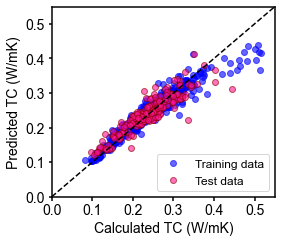

In [39]:
print ("***==========Plots of RF model prediction results==========***")
plt.rc('font',family='Arial',weight='normal')
font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 14,
}
font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 14,
}
plt.figure(figsize=(4,3.5))
plt.plot(y_train,RF_train,color='blue',marker='o',linestyle='', markerfacecolor='b',alpha=0.6)
plt.plot(y_test,RF_test,color='darkred',marker='o',linestyle='', markerfacecolor='deeppink',alpha=0.6)
plt.legend(labels=["Training data","Test data"],loc="lower right",fontsize=12)  
title='Calculated TC (W/mK)'
title1='Predicted TC (W/mK)'
plt.xlabel(title,font1 )
plt.ylabel(title1,font1 )
plt.xlim((0, 0.55))
plt.ylim((0, 0.55))
plt.plot([0,0.55],[0,0.55], color='k', linewidth=1.5, linestyle='--')
my_x_ticks = np.arange(0,0.6,0.1)
my_y_ticks = np.arange(0,0.6,0.1)
plt.xticks(my_x_ticks,size=14)
plt.yticks(my_y_ticks,size=14)
plt.tick_params(width=1.5)
bwith = 1.5 
TK = plt.gca()
TK.spines['bottom'].set_linewidth(bwith)
TK.spines['left'].set_linewidth(bwith)
TK.spines['top'].set_linewidth(bwith)
TK.spines['right'].set_linewidth(bwith)
plt.show()

***==========Plots of KRR model prediction results==========***


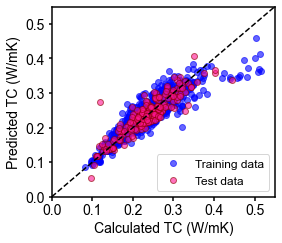

In [40]:
print ("***==========Plots of KRR model prediction results==========***")
plt.rc('font',family='Arial',weight='normal')
font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 14,
}
font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 14,
}
plt.figure(figsize=(4,3.5))
#plt.title("Traing dataset with r2=0.955",font1)
plt.plot(y_train,KRR_train,color='blue',marker='o',linestyle='', markerfacecolor='b',alpha=0.6)
plt.plot(y_test,KRR_test,color='darkred',marker='o',linestyle='', markerfacecolor='deeppink',alpha=0.6)
plt.legend(labels=["Training data","Test data"],loc="lower right",fontsize=12)  
title='Calculated TC (W/mK)'
title1='Predicted TC (W/mK)'
plt.xlabel(title,font1 )
plt.ylabel(title1,font1 )
plt.xlim((0, 0.55))
plt.ylim((0, 0.55))
plt.plot([0,0.55],[0,0.55], color='k', linewidth=1.5, linestyle='--')
my_x_ticks = np.arange(0,0.6,0.1)
my_y_ticks = np.arange(0,0.6,0.1)
plt.xticks(my_x_ticks,size=14)
plt.yticks(my_y_ticks,size=14)
plt.tick_params(width=1.5)
bwith = 1.5
TK = plt.gca()
TK.spines['bottom'].set_linewidth(bwith)
TK.spines['left'].set_linewidth(bwith)
TK.spines['top'].set_linewidth(bwith)
TK.spines['right'].set_linewidth(bwith)
plt.show()

***==========Plots of MLP model prediction results==========***


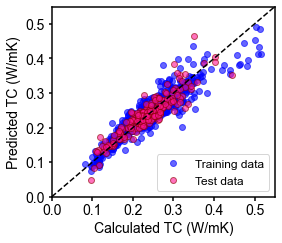

In [41]:
print ("***==========Plots of MLP model prediction results==========***")
plt.rc('font',family='Arial',weight='normal')
font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 14,
}
font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 14,
}
plt.figure(figsize=(4,3.5))
#plt.title("Traing dataset with r2=0.955",font1)
plt.plot(y_train,MLP_train,color='blue',marker='o',linestyle='', markerfacecolor='b',alpha=0.6)
plt.plot(y_test,MLP_test,color='darkred',marker='o',linestyle='', markerfacecolor='deeppink',alpha=0.6)
plt.legend(labels=["Training data","Test data"],loc="lower right",fontsize=12)  
title='Calculated TC (W/mK)'
title1='Predicted TC (W/mK)'
plt.xlabel(title,font1 )
plt.ylabel(title1,font1 )
plt.xlim((0, 0.55))
plt.ylim((0, 0.55))
plt.plot([0,0.55],[0,0.55], color='k', linewidth=1.5, linestyle='--')
my_x_ticks = np.arange(0,0.6,0.1)
my_y_ticks = np.arange(0,0.6,0.1)
plt.xticks(my_x_ticks,size=14)
plt.yticks(my_y_ticks,size=14)
plt.tick_params(width=1.5)
bwith = 1.5
TK = plt.gca()
TK.spines['bottom'].set_linewidth(bwith)
TK.spines['left'].set_linewidth(bwith)
TK.spines['top'].set_linewidth(bwith)
TK.spines['right'].set_linewidth(bwith)
plt.show()

In [32]:
path1="./pretrained_model/"
RF_name = 'RF_Opt.model'
KRR_name = 'KRR_Opt.model'
MLP_name = 'MLP_Opt.model'
joblib.dump(rfg, path1+RF_name)
joblib.dump(model, path1+KRR_name)
joblib.dump(clf, path1+MLP_name)

['MLP_Opt.model']